In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
xls = pd.ExcelFile('FOR_LAB_6.xlsx')

orders = pd.read_excel(xls, 'Orders')
customers = pd.read_excel(xls, 'Customers')
products = pd.read_excel(xls, 'Product')
returns = pd.read_excel(xls, 'Returns')

In [4]:
orders.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Name,Product Base Margin,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Express Air,Corporate,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Global Troy™ Executive Leather Low-Back Tilter,0.60,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Newell 321,0.56,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [5]:
customers.head()

,Customer ID,Customer Name,Birthday
0,3,Bonnie Potter,1990-01-01
1,5,Ronnie Proctor,1990-01-02
2,11,Marcus Dunlap,1990-01-03
3,14,Gwendolyn F Tyson,1990-01-04
4,15,Timothy Reese,1990-01-05


In [6]:
products.head()

,Product Category,Product Sub-Category,Product Container,Product Name
0,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters
1,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter
2,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De..."
3,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...
4,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321


In [9]:
returns.head()

,Order ID,Status
0,65,Returned
1,612,Returned
2,614,Returned
3,678,Returned
4,710,Returned


In [12]:
orders_sales_asc = orders.groupby("Order Date")["Sales"].sum().reset_index().sort_values(by="Order Date", ascending=True)
orders_sales_asc

,Order Date,Sales
0,2015-01-01,8860.06
1,2015-01-02,24319.92
2,2015-01-03,10134.42
3,2015-01-04,5470.58
4,2015-01-05,20160.51
...,...,...
174,2015-06-26,7888.86
175,2015-06-27,338.41
176,2015-06-28,7990.09
177,2015-06-29,3635.91


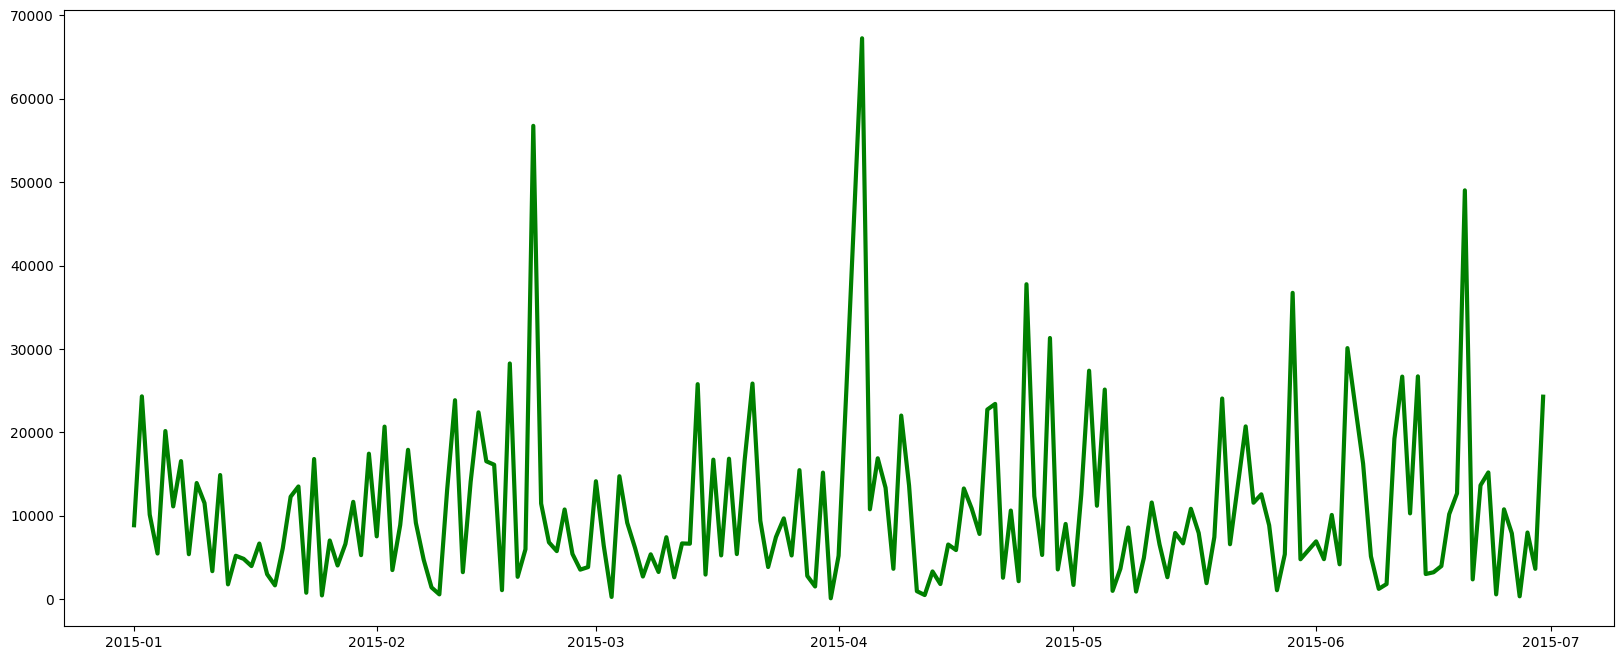

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(orders_sales_asc["Order Date"], orders_sales_asc["Sales"], color="green", linewidth=3)

In [19]:
orders_shipping_cost = orders.groupby("Ship Mode")["Shipping Cost"].sum().reset_index()
orders_shipping_cost

,Ship Mode,Shipping Cost
0,Delivery Truck,12137.80
1,Express Air,2191.46
2,Regular Air,10984.57


Text(0.5, 1.0, 'Shipping Costs by Ship Mode')

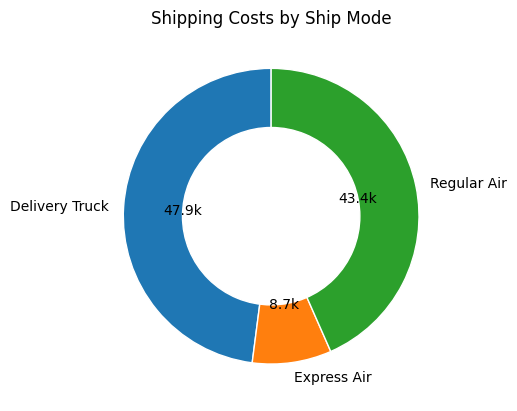

In [23]:
outer_colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.pie(orders_shipping_cost['Shipping Cost'], labels=orders_shipping_cost['Ship Mode'], autopct='%1.1fk', startangle=90,
        colors=outer_colors, wedgeprops={'edgecolor': 'white'})

inner_colors = ['white']
plt.pie([1], radius=0.6, colors=inner_colors,
        wedgeprops={'edgecolor': 'white'})

plt.title('Shipping Costs by Ship Mode')


In [30]:
sales_by_customer = pd.merge(orders, customers, on='Customer ID', how='inner')
sales_by_customer = sales_by_customer.groupby("Customer Name")["Sales"].sum().reset_index().sort_values(by="Sales")
sales_by_customer

,Customer Name,Sales
173,Christina Matthews,3.42
874,Phillip Chappell,3.51
1069,Tonya Miller,4.21
158,Catherine Mullins,5.90
312,Elsie Pridgen,6.97
...,...,...
1127,Yvonne Mann,28779.13
937,Rosemary O'Brien,29916.01
1065,Toni Swanson,32194.12
830,Nina Horne Kelly,48295.12


<Figure size 1500x2000 with 0 Axes>

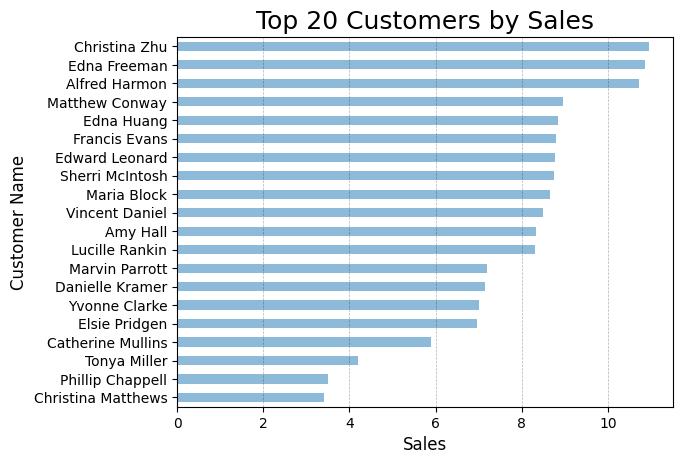

In [36]:
plt.figure(figsize=(15, 20))

sales_by_customer[:20].plot(kind='barh', x='Customer Name', y='Sales', alpha=0.5, legend=False, zorder=1)
plt.title('Top 20 Customers by Sales', fontsize=18)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)

plt.gca()
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='black', alpha=0.3)

plt.show()

In [45]:
orders['Delivery Time'] = orders['Ship Date'] - orders['Order Date']
orders['Delivery Time'] = orders['Delivery Time'].dt.days
avg_delivery_time_by_type = orders.groupby("Ship Mode")["Delivery Time"].mean().reset_index()
avg_delivery_time_by_type

,Ship Mode,Delivery Time
0,Delivery Truck,1.894545
1,Express Air,1.800000
2,Regular Air,1.972860


0.0
1.0
2.0


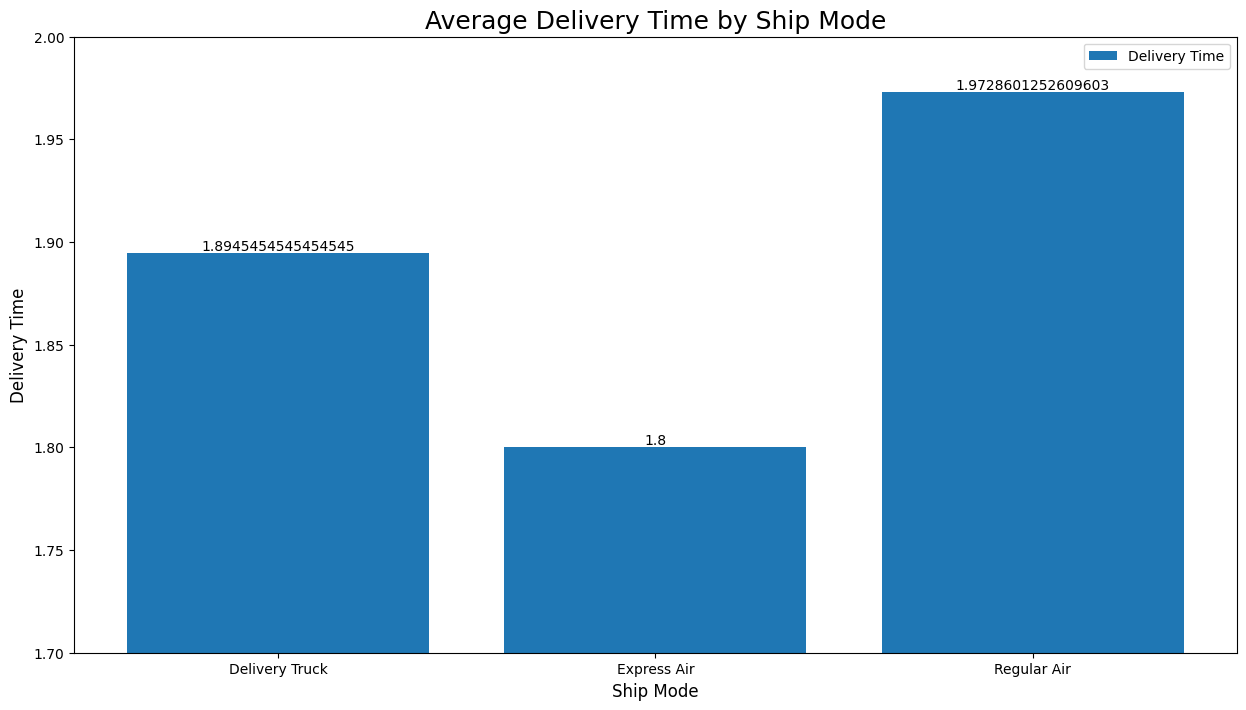

In [54]:
plt.figure(figsize=(15, 8))
plt.ylim(1.7, 2)

bars = plt.bar(avg_delivery_time_by_type['Ship Mode'], avg_delivery_time_by_type['Delivery Time'], )

# Add value labels to each bar
for bar in bars:
    yval = bar.get_height()
    val = bar.get_x() + bar.get_width() / 2
    val = round(val, 2)
    plt.text(val, yval, yval, ha='center', va='bottom')

plt.title('Average Delivery Time by Ship Mode', fontsize=18)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Delivery Time', fontsize=12)

# Add legend
plt.legend([bars[0]], ['Delivery Time'])

plt.show()

